<a href="https://colab.research.google.com/github/fdch/dreamsound/blob/main/DreamSound_Package_Example_v_0_1_6_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install and import DreamSound
!pip install dreamsound > /dev/null 2>&1
!curl -O https://storage.googleapis.com/audioset/golden_whistle.wav  > /dev/null 2>&1
!curl -O https://storage.googleapis.com/audioset/miaow_16k.wav  > /dev/null 2>&1
!curl -O https://storage.googleapis.com/audioset/yamalyzer/audio/piano.wav  > /dev/null 2>&1
import dreamsound
print("DreamSound Version:", dreamsound.__version__)

DreamSound Version: 0.1.6.3


In [ ]:
audio_files=["golden_whistle.wav", "miaow_16k.wav", "piano.wav"]
ds = dreamsound.DreamSound(paths=audio_files)

Using last layer.
Yamnet loaded, using layer:activation
Dreamer started.
Loading audio files...
Done.
DreamSound has 3 audio files in memory.


Target class: Animal ...
Running step 0, class: Whistling ...
Running step 1, class: Sound effect ...
Running step 2, class: Animal ...
Running step 3, class: Animal ...
Running step 4, class: Sound effect ...
Running step 5, class: Sound effect ...
Running step 6, class: Sound effect ...
Running step 7, class: Animal ...
Running step 8, class: Sound effect ...
Running step 9, class: Animal ...


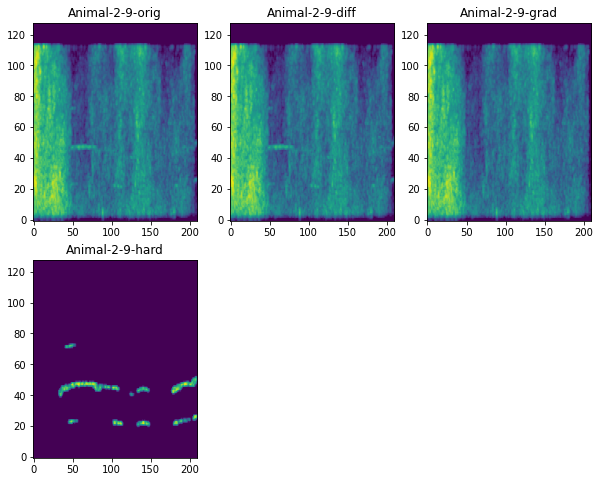

In [ ]:
#@title #Input Parameters { form-width: "500px" }
#@markdown ##Plotting and Saving
save="0" #@param  [1, 0]
show="1" #@param [1, 0]
play="1" #@param [1, 0]
verbose="1" #@param [1, 0]
#@markdown ---
#@markdown ##Number of Steps
ds.steps=10 #@param {type:"slider", min:1, max:200, step:1}
#@markdown ##Output Interval
ds.plot_every=10 #@param {type:"slider", min:1, max:200, step:1}
#@markdown ##Variables
#@markdown Use max activation class
argmax="0" #@param [1, 0]
#@markdown Flip between convolution inputs
flip="0" #@param [1, 0]
#@markdown Activation Maximization Function
output_type="2" #@param  [0, 1, 2, 3, 4]
#@markdown Threshold for Hard-cut Filter
ds.threshold=0.71 #@param {type:"slider", min:0, max:1, step:0.01}
#@markdown Feedback loop attenuation
ds.step_size=0.78 #@param  {type:"slider", min:0, max:1, step:0.01}
#@markdown Source Audio Index
audio_index="0" #@param  [0, 1, 2, 3, 4]
#@markdown Target Audio Index (disable with -1) 
target="1" #@param  [-1, 0, 1, 2, 3, 4]


# fix google colab parameter types first...
target  = None if "-1" in target else int(target)
flip    = True if flip=="1" else False
argmax  = True if argmax=="1" else False
ds.save = True if save=="1" else False
ds.show = True if show=="1" else False
ds.play = True if play=="1" else False
ds.verbose = True if verbose=="1" else False
ds.output_type=int(output_type)


# to run it, call the class:
ds(audio_index=int(audio_index), 
   target=target, 
   argmax=argmax, 
   flip=flip)



In [ ]:
import numpy as np

In [ ]:
noise = np.random.random((22050*2,)).astype(np.float32)
ds.audio.append(noise)
ds.audio[2].shape

(220500,)

In [ ]:
ds.step_size=0.8
ds.output_type=2

Target class: Music ...
Running step 0, class: White noise ...
Running step 1, class: Speech ...
Running step 2, class: Music ...
Running step 3, class: Music ...
Running step 4, class: Music ...
Running step 5, class: Music ...
Running step 6, class: Music ...
Running step 7, class: Music ...
Running step 8, class: Music ...
Running step 9, class: Music ...


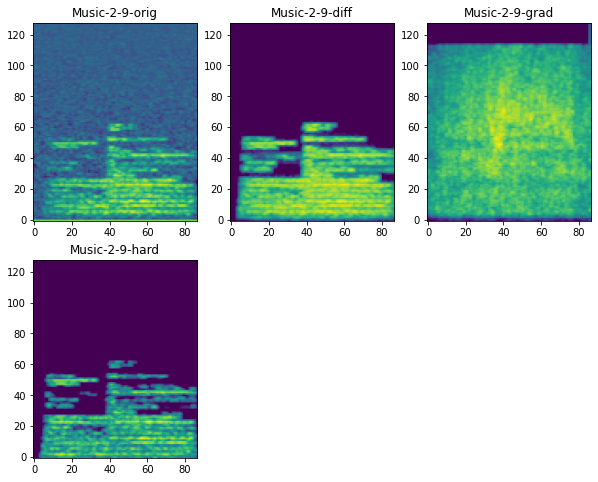

In [ ]:
ds(audio_index=3, target=2, argmax=False, flip=False)

Target class: Music ...
Running step 10, class: Music ...
Running step 11, class: Music ...
Running step 12, class: Animal ...
Running step 13, class: Animal ...
Running step 14, class: Animal ...
Running step 15, class: Sound effect ...
Running step 16, class: Sound effect ...
Running step 17, class: Speech ...
Running step 18, class: Sound effect ...
Running step 19, class: Mosquito ...


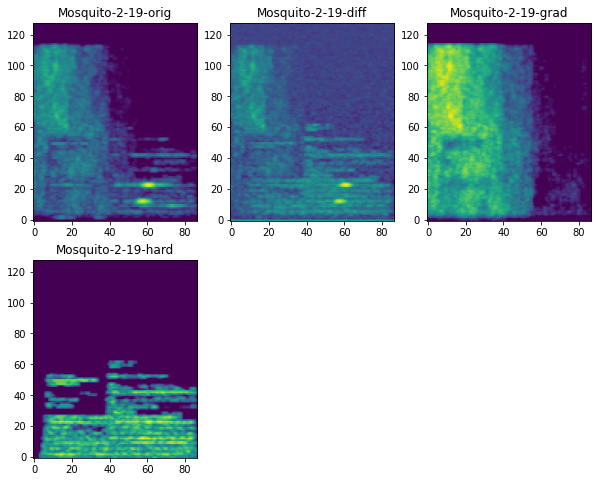

In [ ]:
ds()

Target class: Music ...
Running step 20, class: Sound effect ...
Running step 21, class: Music ...
Running step 22, class: Sound effect ...
Running step 23, class: Music ...
Running step 24, class: Pig ...
Running step 25, class: Speech ...
Running step 26, class: Pig ...
Running step 27, class: Music ...
Running step 28, class: Pig ...
Running step 29, class: Sound effect ...


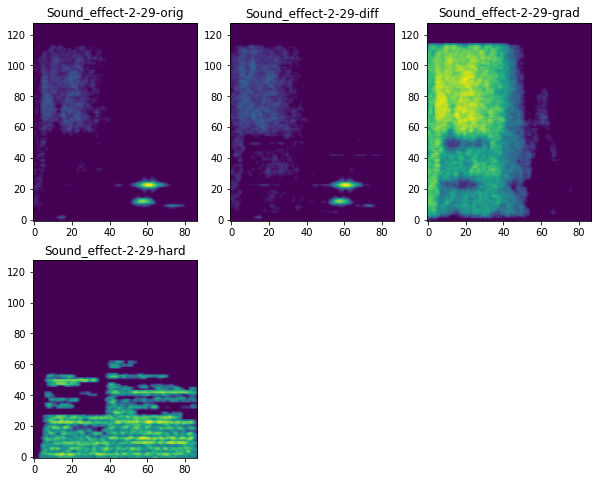

In [ ]:
ds()

In [ ]:
ds.classid

<tf.Tensor: shape=(), dtype=int64, numpy=67>

Input noise, large threshold, small step size,
default output type and many steps

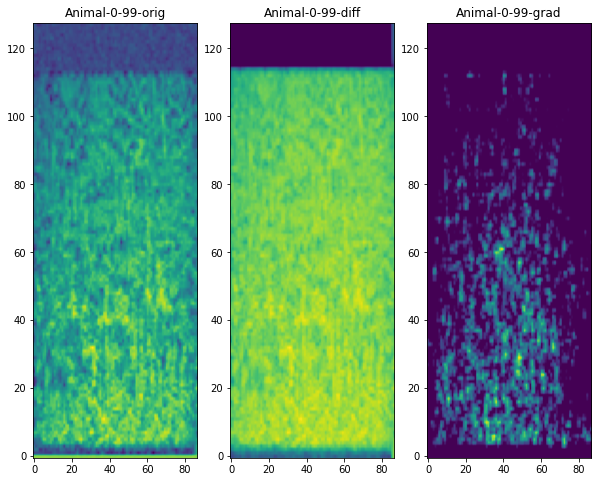

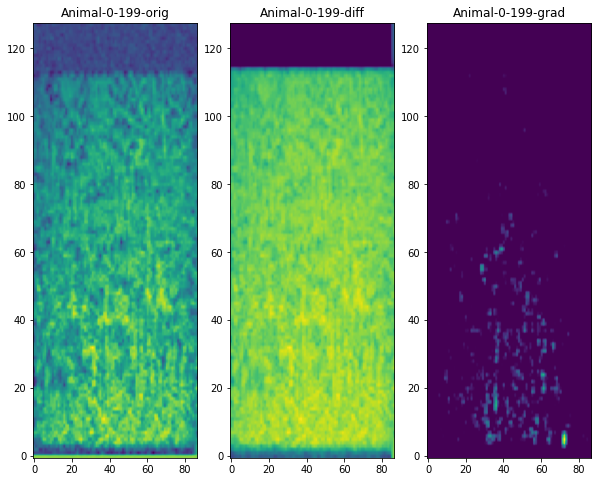

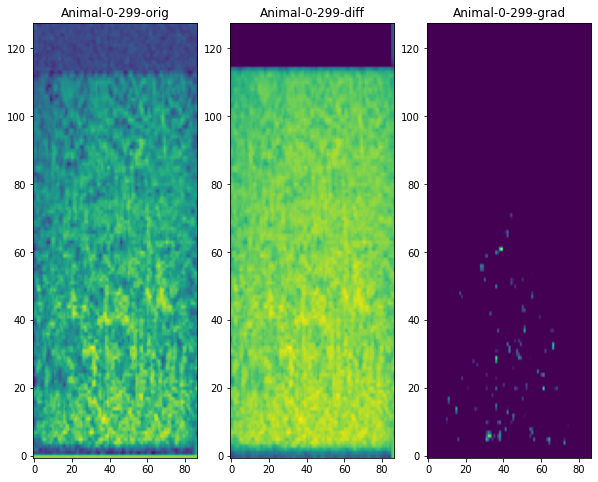

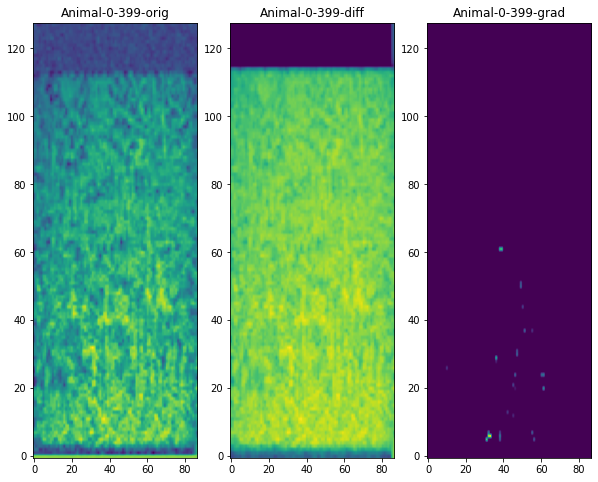

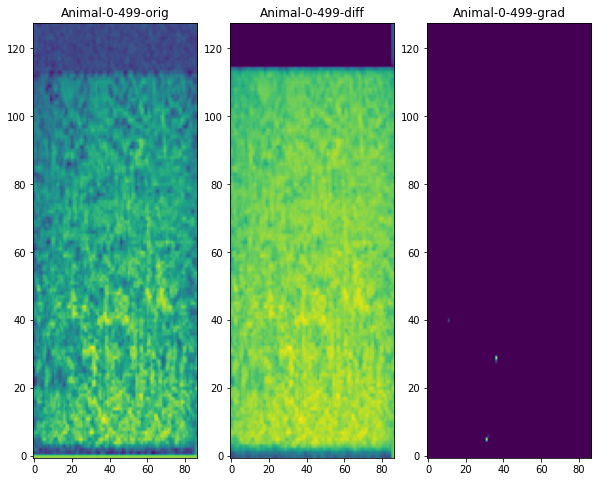

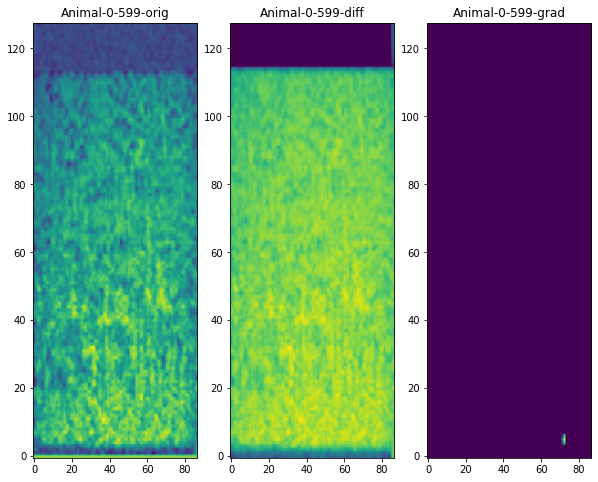

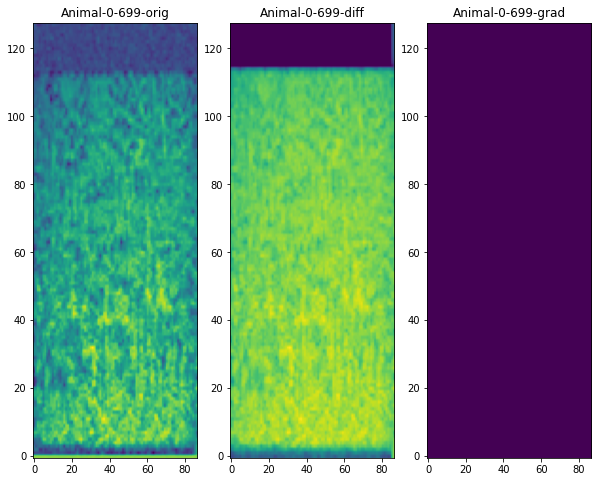

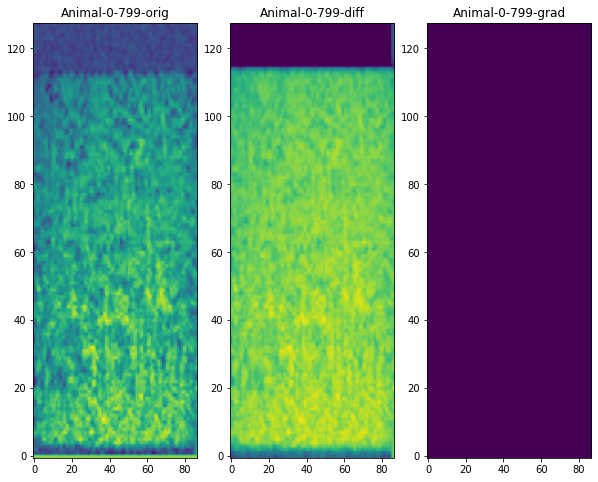

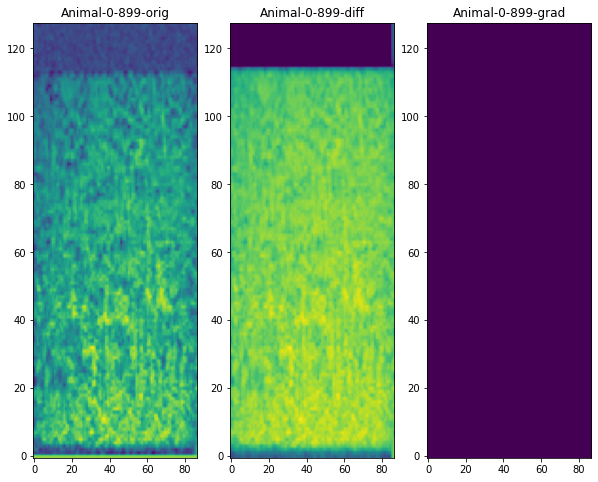

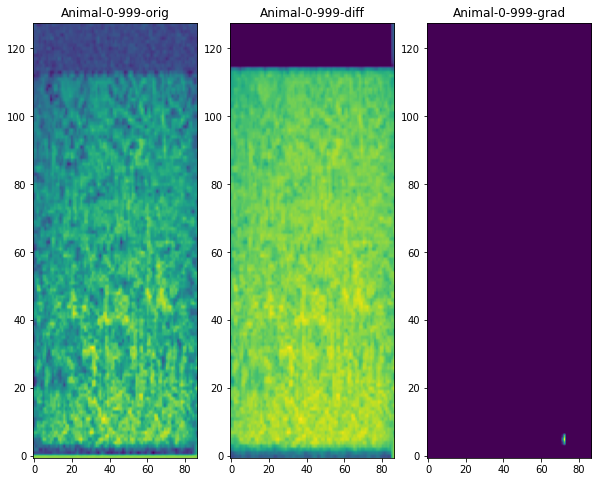

In [ ]:
ds.verbose=False
ds.show=True
ds.play=True
ds.save=False
ds.steps=1000
ds.plot_every=100
ds.step_size=0.3
ds.threshold=0.85
ds.output_type=0
ds.classid = 50
ds(audio_index=4, argmax=True)